# Projeto 2 - Classificador multi-rótulo - arXiv Paper Abstract

## arXiv Paper Abstract - Kaggle
Este é um conjunto de artigos contidos no arXiv com múltiplo rótulos.

## Sobre este projeto
Os principais pontos que serão avaliados:
 - Extração de dados
 - Manipulação de dados e criação de gráficos simples com o Pandas
 - Criar um modelo de predição
 - Apresentação dos resultados

## Preparação do ambiente
Faça o download e carregue o dataset arXiv Paper Abstracts.

In [45]:
import pandas as pd
import numpy as np
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split


## Exercícios

### Questão 1) Faça a leitura dos dados e implemente rotinas de pré-processamento:

In [46]:
df = pd.read_csv('dados/arxiv_data_210930-054931.csv')
df.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


In [47]:
df.shape

(56181, 3)

#### a) Implemente e justifique suas ações em relação ao tratamento dos rótulos (1,5 pontos)

Será realizada a remoção de espaços entre os rótulos assi como subdivisões por virgula com o comando split, e esse novo conjunto será posto em uma nova coluna no DataFrame com nome de classes, após isso será realizada a contagem de frequencia de cada rótulo com objetivo de remover rótulos com pouca frequencia, e por ultimo será realizada a binarização dos rótulos para ser usado nos modelos futuros.

In [48]:
df['classes']  = df.terms.apply(lambda x : [n.strip() for n in x.split(',')]).tolist()


In [122]:
df.head()

,terms,titles,abstracts,classes
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,[['cs.LG']]
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,"[['cs.LG', 'cs.AI']]"
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,"[['cs.LG', 'cs.CR', 'stat.ML']]"
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,"[['cs.LG', 'cs.CR']]"
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,[['cs.LG']]


In [5]:
#pd.set_option('display.max_rows',None)
count = df.terms.value_counts()
count.shape


(3402,)

In [6]:
manter = count[count > 99]
manter.shape

(43,)

Será mantido os rótulos com frequencias superior a 100

In [7]:
manter

['cs.CV']                                 18719
['cs.LG', 'stat.ML']                       5431
['cs.LG']                                  2871
['cs.CV', 'cs.LG']                         2170
['cs.LG', 'cs.AI']                         1783
['cs.LG', 'cs.AI', 'stat.ML']              1512
['stat.ML', 'cs.LG']                       1497
['cs.CV', 'cs.AI']                          997
['cs.CV', 'cs.LG', 'eess.IV']               891
['cs.CV', 'eess.IV']                        801
['cs.CV', 'cs.GR']                          693
['cs.LG', 'cs.CV', 'stat.ML']               682
['cs.CV', 'cs.RO']                          652
['cs.CV', 'cs.AI', 'cs.LG']                 564
['cs.CV', 'cs.LG', 'stat.ML']               469
['cs.LG', 'cs.CV']                          436
['cs.CV', 'cs.CL']                          273
['stat.ML']                                 272
['cs.CV', 'cs.GR', 'cs.LG']                 261
['cs.LG', 'cs.CL', 'stat.ML']               256
['cs.LG', 'cs.SI', 'stat.ML']           

In [8]:
df = df[df.terms.isin(manter.index)]
df.shape

(44704, 4)

In [9]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
mlb = MultiLabelBinarizer()
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
tfidf_transformer = TfidfTransformer()

In [10]:
df.head()

,terms,titles,abstracts,classes
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,[['cs.LG']]
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,"[['cs.LG', 'cs.AI']]"
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,"[['cs.LG', 'cs.CR', 'stat.ML']]"
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,"[['cs.LG', 'cs.CR']]"
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,[['cs.LG']]


Realizando a transformação binaria dos rótulos.

In [11]:
y = df.classes
mlb.fit(y)
y = mlb.transform(y)
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [12]:
y[1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [13]:
y.shape

(44704, 30)

#### b) Implemente e justifique suas ações em relação aos dados (titles e abstacts) (1,5 pontos)

Para tratamento dos titulos e abstracts será realizada a remoção de caracteres especiais assim como a padronização de todo o texto para letras minusculas para logo após fazer a tokenização e lemmatização dos textos removendo palavras desnecessaria (artigos,pronomes, etc.) para a aplicação do modelo.

Assim como realizado com os rótulos essa padronização será incrementada em novos campos no DataFrame (new_title, new_abstratc) mantendo a integridade dos dados primários.

In [14]:
def processamento(tokens):
    
    token_processado = []
    for token in tokens:
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        
        if token not in stop_words:
            token = stemmer.stem(token)
            token_processado.append(token)
        
    return token_processado

In [15]:
documentos_abstract = []
for abstract in df.abstracts:
    
    # expressao regular para remover pontuacoes do texto
    abstract = re.sub(r'[^\w\s]','', abstract)
    tokens = processamento(word_tokenize(abstract))
    
    documentos_abstract.append(' '.join(tokens))



In [16]:
df['new_abstract'] = documentos_abstract
df.head()

,terms,titles,abstracts,classes,new_abstract
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,[['cs.LG']],graph neural network gnn wide use learn vector...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,"[['cs.LG', 'cs.AI']]",deep network decis forest random forest gradie...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,"[['cs.LG', 'cs.CR', 'stat.ML']]",graph convolut network gcn power tool graphstr...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,"[['cs.LG', 'cs.CR']]",increas popular graph neural network gnn sever...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,[['cs.LG']],machin learn solut pattern classif problem now...


In [17]:
documentos_title = []
for title in df.titles:
    
    # expressao regular para remover pontuacoes do texto
    title = re.sub(r'[^\w\s]','', title)
    tokens = processamento(word_tokenize(title))
    
    documentos_title.append(' '.join(tokens))

In [18]:
df['new_titles'] = documentos_title
df.head()

,terms,titles,abstracts,classes,new_abstract,new_titles
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,[['cs.LG']],graph neural network gnn wide use learn vector...,multilevel attent pool graph neural network un...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,"[['cs.LG', 'cs.AI']]",deep network decis forest random forest gradie...,decis forest v deep network conceptu similar e...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,"[['cs.LG', 'cs.CR', 'stat.ML']]",graph convolut network gcn power tool graphstr...,power robust graph convolut network via graph ...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,"[['cs.LG', 'cs.CR']]",increas popular graph neural network gnn sever...,releas graph neural network differenti privaci...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,[['cs.LG']],machin learn solut pattern classif problem now...,recurrenceawar longterm cognit network explain...


### Questão 2) Faça uma análise visual do dataset após o pré-processamento. Explore gráficos e/ou tabelas para mostrar a distribuição dos rótulos. (1,0 ponto)

In [181]:
def consulta(termo):
    count = 0
    for x in df.terms:
        if termo in x:
            count += 1
    return count

In [182]:
count_CV = consulta('cs.CV')
count_LG = consulta('cs.LG')
count_stat_ML = consulta('stat.ML')
count_AI = consulta('cs.AI')
count_eess_IV = consulta('eess.IV')
count_RO = consulta('cs.RO')
count_GR = consulta('cs.GR')
count_CL = consulta('cs.CL')
count_NE = consulta('cs.NE')
count_CR = consulta('cs.CR')
count_ees_SP = consulta('eess.SP')
count_MM = consulta('cs.MM')
count_math_OC = consulta('math.OC')
count_SI = consulta('cs.SI')

In [183]:
dados = {'Rótulo':['cs.CV','cs.LG','stat.ML','cs.AI','eess.IV','cs.RO','cs.GR','cs.CL','cs.NE','cs.CR','eess.SP','cs.MM','math.OC','cs.SI'],
         'Frequencia':[count_CV,count_LG,count_stat_ML,count_AI,count_eess_IV,count_RO,count_GR,count_CL,count_NE,count_CR,count_ees_SP,count_MM,count_math_OC,count_SI]
         }

In [184]:
dados = pd.DataFrame(dados)
dados

,Rótulo,Frequencia
0,cs.CV,33433
1,cs.LG,30939
2,stat.ML,16570
3,cs.AI,8391
4,eess.IV,2647
5,cs.RO,2054
6,cs.GR,1614
7,cs.CL,1659
8,cs.NE,1378
9,cs.CR,739


In [187]:
import seaborn as sns

<AxesSubplot:title={'center':'Grafico de Frequencia de Rótulos'}, xlabel='Rótulo', ylabel='Frequencia'>

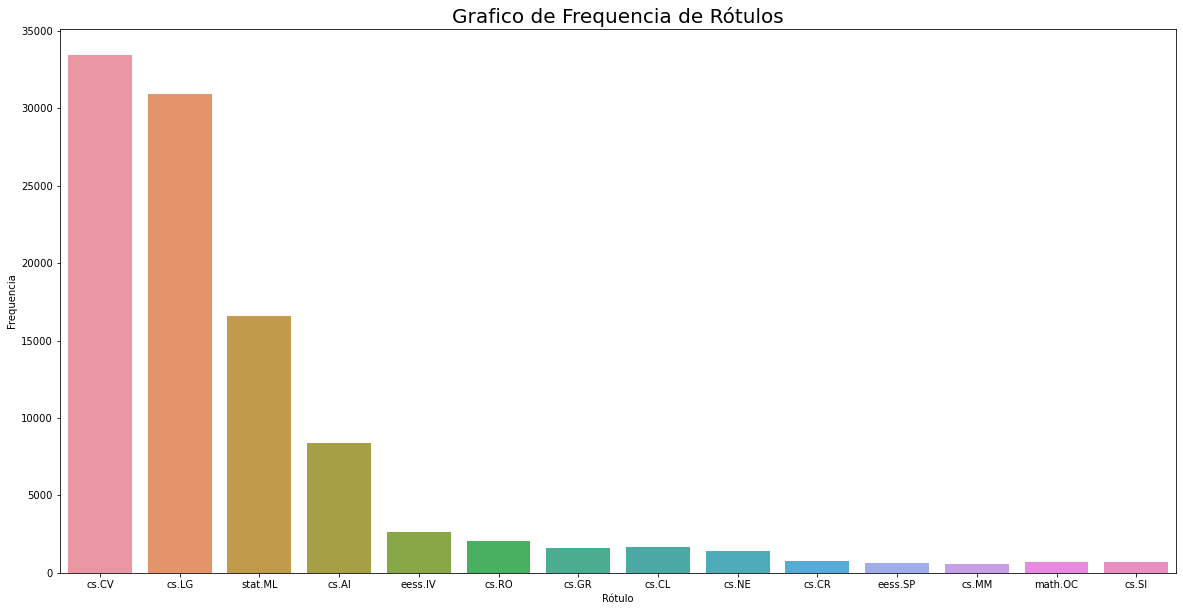

In [196]:
ax = sns.barplot(data=dados, x='Rótulo',y='Frequencia')
ax.figure.set_size_inches([20,10])
ax.set_title('Grafico de Frequencia de Rótulos',fontsize=20)
ax

### Questão 3) Escolha uma metodologia para extração de características considerando somente o título dos artigos científicos. (1,0 ponto)

In [89]:
X_train_counts = vectorizer.fit_transform(df.new_titles)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X = X_train_tfidf

### Questão 4) Implemente o processo de classificação multi rótulos. Implemente 3 classificadores diferentes e compare suas performances. Escolha duas métricas distintas de sua escolha. Justifique suas escolhas e interprete os resultados (2,0 pontos)

Para esse estudo será ultilizado as seguintes metricas:
 - Acuracia
 - Precisão
 - Recall

O objetivo é tentar identificar o quão preditivo está os modelos analisando os indices de acertos com a acuracia e comparando os resultados com a precisão do modelo e com a sensitividade, com objetivo de descobrir se os modelos tem tendencias a classificação de erros positivos (Precisão) ou negativos(Recall).

In [20]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [91]:
abstracts = df.abstracts
X_train,X_test,y_train,y_test,abstract_train,abstract_test = train_test_split(X,y,abstracts,test_size=0.2, stratify=y, random_state=10)



In [92]:
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)

'rf = RandomForestClassifier().fit(X_train,y_train)\ny_pred = rf.predict(X_test)'

In [65]:
print(f'Acuracia: {accuracy_score(y_test,y_pred).round(2)}')
print(f'Precisão: {precision_score(y_test,y_pred, average="macro",zero_division=0).round(2)}')
print(f'Sensitividade: {recall_score(y_test,y_pred,average="macro").round(2)}')

Acuracia: 0.6
Precisão: 0.96
Sensitividade: 0.43


In [98]:


svm = SGDClassifier()
clf = OneVsRestClassifier(svm).fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)

In [99]:
print(f'Acuracia: {accuracy_score(y_test,y_pred_svm).round(2)}')
print(f'Precisão: {precision_score(y_test,y_pred_svm, average="macro",zero_division=0).round(2)}')
print(f'Sensitividade: {recall_score(y_test,y_pred_svm,average="macro").round(2)}')

Acuracia: 0.23
Precisão: 0.24
Sensitividade: 0.03


In [112]:

lr = LogisticRegression(solver='sag')
clf = OneVsRestClassifier(lr).fit(X_train,y_train)
y_pred_nb = clf.predict(X_test)

In [113]:
print(f'Acuracia: {accuracy_score(y_test,y_pred_nb).round(2)}')
print(f'Precisão: {precision_score(y_test,y_pred_nb, average="macro",zero_division=0).round(2)}')
print(f'Sensitividade: {recall_score(y_test,y_pred_nb,average="macro").round(2)}')

Acuracia: 0.31
Precisão: 0.23
Sensitividade: 0.04


Dos três modelos ultilizados o que obtevo melhor desempenho foi a RandomForest, com um indice de acerto em 60% (acuracia), porem ao analisar a precisão em conjunto com o recall, percebe-se que o modelo foi bastante preciso quando se trata da repetição da predições ou seja os dados apresentam uma baixa variabilidade concedendo um indice de 96% (precisão), mas tambem houve um indice de recall significativo apontando que o modelo tem uma tendencia a classificação de Falsos Positivos.

### Questão 5) Replique os mesmos experimentos de extração de características e classificação considerando somente a coluna abstract. (2,0 pontos)

In [18]:
X_train_counts = vectorizer.fit_transform(df.new_abstract)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X = X_train_tfidf

In [19]:
titles = df.titles
X_train,X_test,y_train,y_test,title_train,title_test = train_test_split(X,y,titles,test_size=0.2, stratify=y, random_state=10)

In [21]:
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [22]:
print(f'Acuracia: {accuracy_score(y_test,y_pred).round(2)}')
print(f'Precisão: {precision_score(y_test,y_pred, average="macro",zero_division=0).round(2)}')
print(f'Sensitividade: {recall_score(y_test,y_pred,average="macro").round(2)}')

Acuracia: 0.67
Precisão: 0.98
Sensitividade: 0.43


In [23]:
svm = SGDClassifier()
clf = OneVsRestClassifier(svm).fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)

In [24]:
print(f'Acuracia: {accuracy_score(y_test,y_pred_svm).round(2)}')
print(f'Precisão: {precision_score(y_test,y_pred_svm, average="macro",zero_division=0).round(2)}')
print(f'Sensitividade: {recall_score(y_test,y_pred_svm,average="macro").round(2)}')

Acuracia: 0.34
Precisão: 0.38
Sensitividade: 0.05


In [25]:
lr = LogisticRegression(solver='sag')
clf = OneVsRestClassifier(lr).fit(X_train,y_train)
y_pred_nb = clf.predict(X_test)

In [26]:
print(f'Acuracia: {accuracy_score(y_test,y_pred_nb).round(2)}')
print(f'Precisão: {precision_score(y_test,y_pred_nb, average="macro",zero_division=0).round(2)}')
print(f'Sensitividade: {recall_score(y_test,y_pred_nb,average="macro").round(2)}')

Acuracia: 0.36
Precisão: 0.28
Sensitividade: 0.05


Dos três modelos ultilizados o que obtevo melhor desempenho foi a RandomForest, com um indice de acerto em 60% (acuracia), porem ao analisar a precisão em conjunto com o recall, percebe-se que o modelo foi bastante preciso quando se trata da repetição da predições ou seja os dados apresentam uma baixa variabilidade concedendo um indice de 98% (precisão), mas tambem houve um indice de recall significativo apontando que o modelo tem uma tendencia a classificação de Falsos Positivos.

### Questão 6) Compare os resultados obtidos dos titles e abstracts. Qual atributo é mais discriminativo? (1,0 ponto)

Analisando e comparando os resultados, percebe-se que ambos os atributos mostraram ser baastante eficaz quanto a discriminação dos dados, porem apesar do atributo abstract mostrou um maior indice de discriminação, em termos percentuais esta muito proximo do que foi ofertado ao usar o title, analisando a melhor modelo (RandomForest) e a metrica acuracia, percebe-se que a diferença percentual é de 0.07% maior ao usar o atributo abstract.